# Flight Booking Price Prediction

In [168]:
# import libraray
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [169]:
# dataset
flight=pd.read_csv('Flight_Booking.csv')
flight.head()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [170]:
flight.shape

(300153, 12)

In [171]:
# drop column
flight.drop('Unnamed: 0',axis=1,inplace=True)

In [172]:
flight.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [173]:
flight.shape

(300153, 11)

In [174]:
flight.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300153 non-null  object 
 1   flight            300153 non-null  object 
 2   source_city       300153 non-null  object 
 3   departure_time    300153 non-null  object 
 4   stops             300153 non-null  object 
 5   arrival_time      300153 non-null  object 
 6   destination_city  300153 non-null  object 
 7   class             300153 non-null  object 
 8   duration          300153 non-null  float64
 9   days_left         300153 non-null  int64  
 10  price             300153 non-null  int64  
dtypes: float64(1), int64(2), object(8)
memory usage: 25.2+ MB


In [175]:
flight.describe()

,duration,days_left,price
count,300153.000000,300153.000000,300153.000000
mean,12.221021,26.004751,20889.660523
std,7.191997,13.561004,22697.767366
min,0.830000,1.000000,1105.000000
25%,6.830000,15.000000,4783.000000
50%,11.250000,26.000000,7425.000000
75%,16.170000,38.000000,42521.000000
max,49.830000,49.000000,123071.000000


In [176]:
# isnull
flight.isnull().sum().sum()

0

In [177]:
flight.duplicated().sum()

0

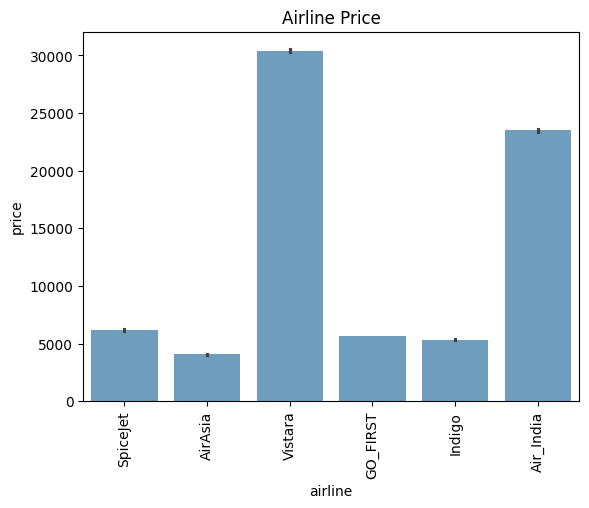

In [178]:
# visulaize airline price
sns.barplot(x='airline', y='price', data=flight,alpha=0.7)
plt.xticks(rotation=90)
plt.title('Airline Price')
plt.show()

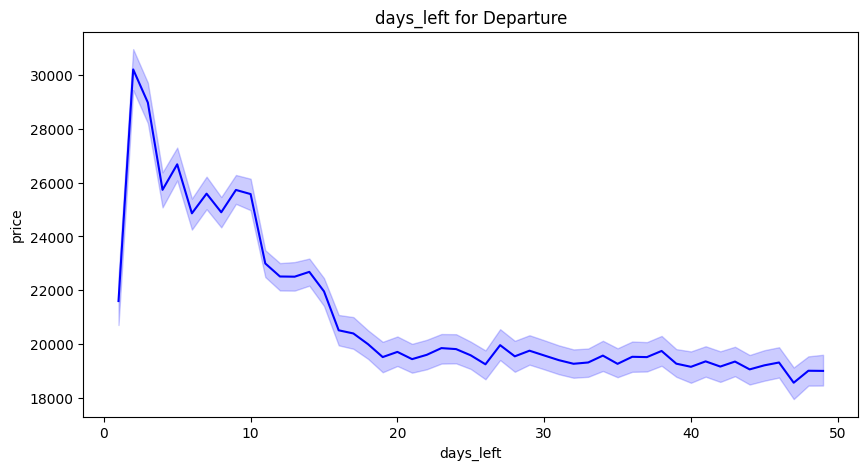

In [179]:
# line plot
plt.figure(figsize=(10,5))
sns.lineplot(x='days_left',y='price',data=flight,color='blue')
plt.title('days_left for Departure')
plt.show()

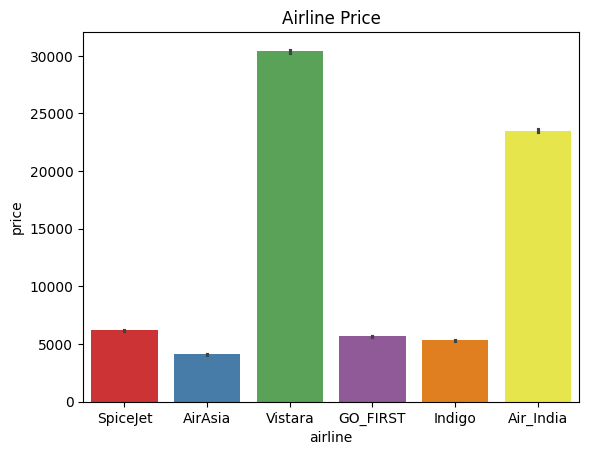

In [180]:
# barplt
sns.barplot(x=flight['airline'],y=flight['price'],palette='Set1')
plt.title('Airline Price')
plt.show()

In [181]:
flight.head(2)

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953


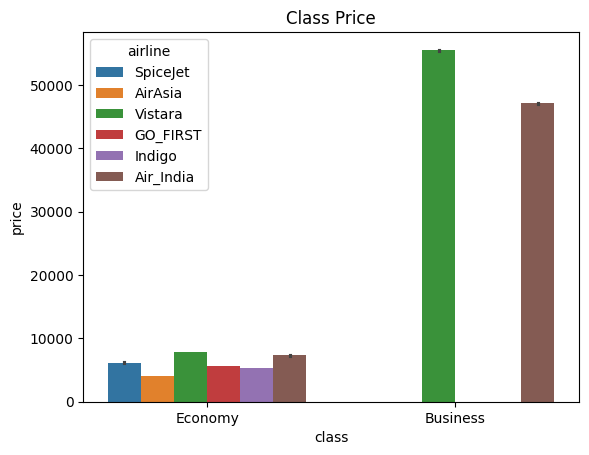

In [182]:
# barplot
sns.barplot(x=flight['class'], y=flight['price'], hue=flight['airline'])
plt.title('Class Price')
plt.show()

#  Range of price of flights with source and destination city according to the  days left

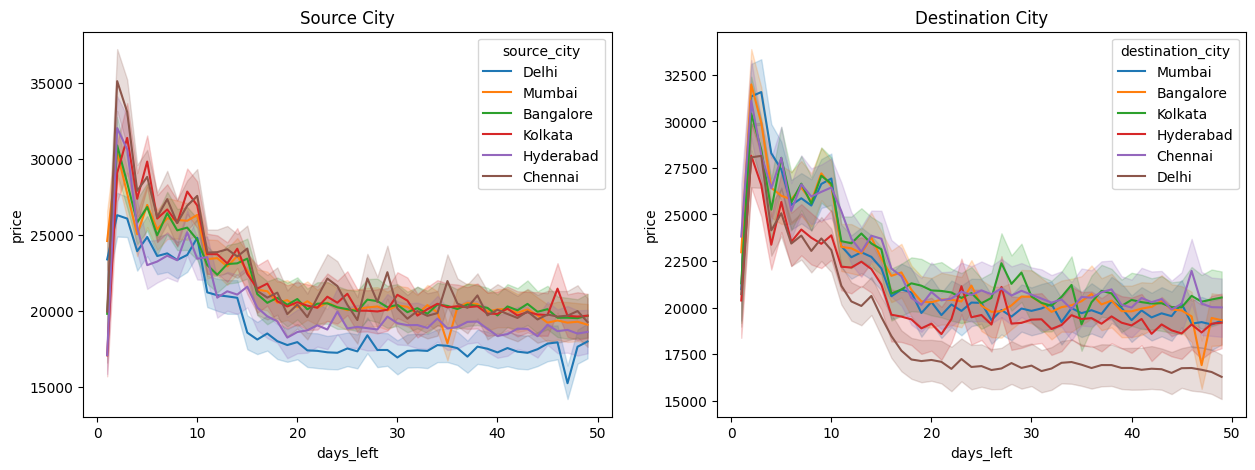

In [183]:
plt.figure(figsize=(15,5))
# Subplot 1: Frequency of Airline
plt.subplot(1, 2, 1)
sns.lineplot(x=flight['days_left'],y=flight['price'],hue=flight['source_city'])
plt.title('Source City')

plt.subplot(1, 2, 2)
sns.lineplot(x=flight['days_left'],y=flight['price'],hue=flight['destination_city'])
plt.title('Destination City')
plt.show()

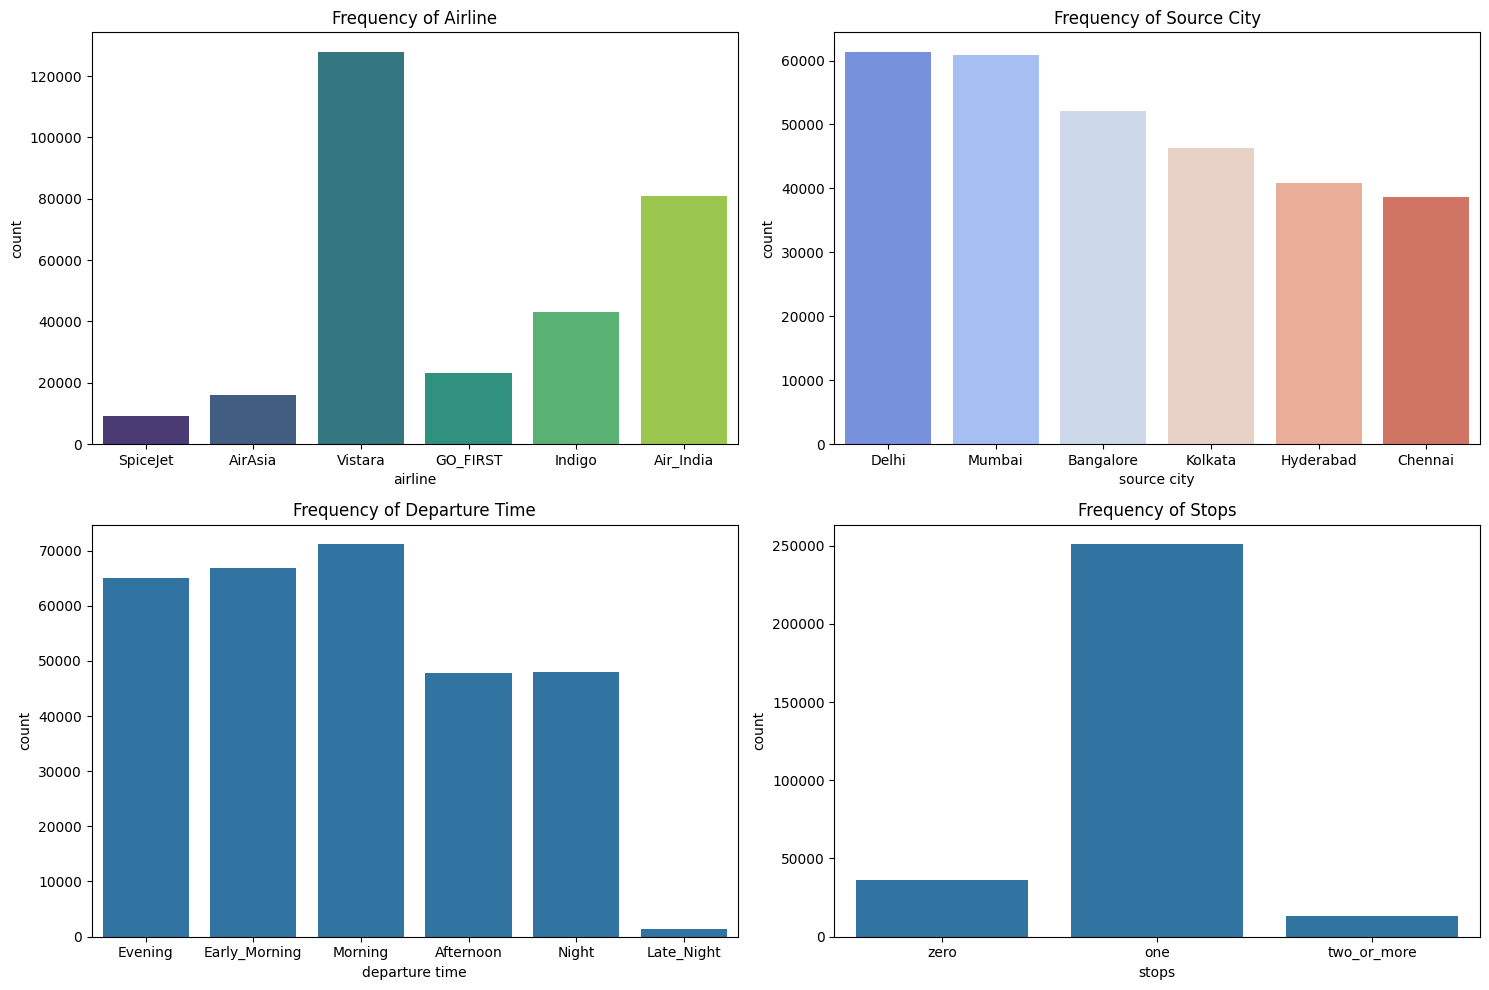

In [184]:
# Set the figure size
plt.figure(figsize=(15, 10))
df=flight.copy()
# Subplot 1: Frequency of Airline
plt.subplot(2, 2, 1)
sns.countplot(x='airline', data=df,palette='viridis')
plt.title('Frequency of Airline')
plt.xlabel('airline')
plt.ylabel('count')

# Subplot 2: Frequency of Source City
plt.subplot(2, 2, 2)
sns.countplot(x='source_city', data=df,palette='coolwarm')
plt.title('Frequency of Source City')
plt.xlabel('source city')
plt.ylabel('count')

# Subplot 3: Frequency of Departure Time
plt.subplot(2, 2, 3)
sns.countplot(x='departure_time', data=df)
plt.title('Frequency of Departure Time')
plt.xlabel('departure time')
plt.ylabel('count')

# Subplot 4: Frequency of Stops
plt.subplot(2, 2, 4)
sns.countplot(x='stops', data=df)
plt.title('Frequency of Stops')
plt.xlabel('stops')
plt.ylabel('count')

# Adjust layout and display the plots
plt.tight_layout()
plt.show()

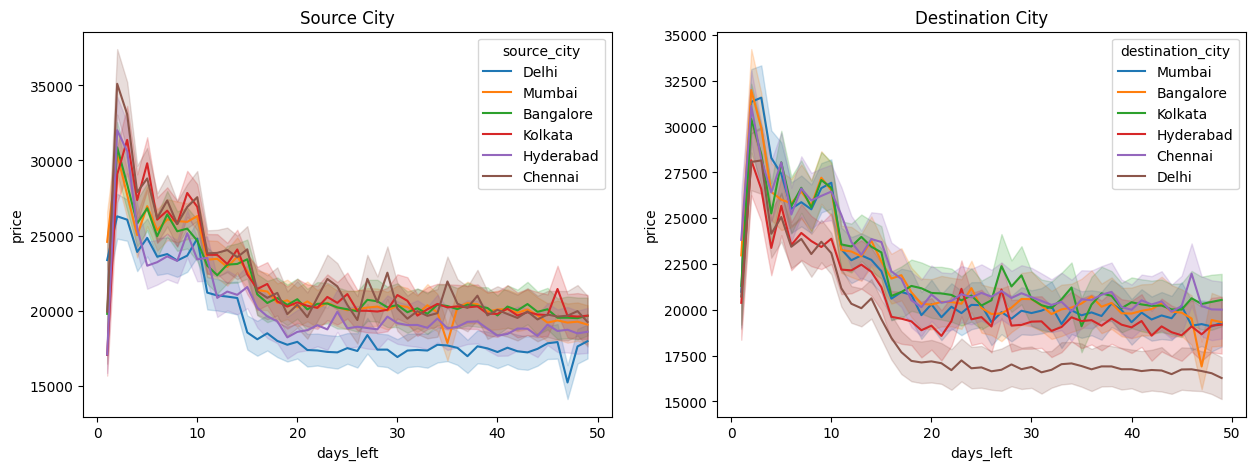

In [185]:
plt.figure(figsize=(15,5))
# Subplot 1: Frequency of Airline
plt.subplot(1, 2, 1)
sns.lineplot(x=flight['days_left'],y=flight['price'],hue=flight['source_city'])
plt.title('Source City')

plt.subplot(1, 2, 2)
sns.lineplot(x=flight['days_left'],y=flight['price'],hue=flight['destination_city'])
plt.title('Destination City')
plt.show()






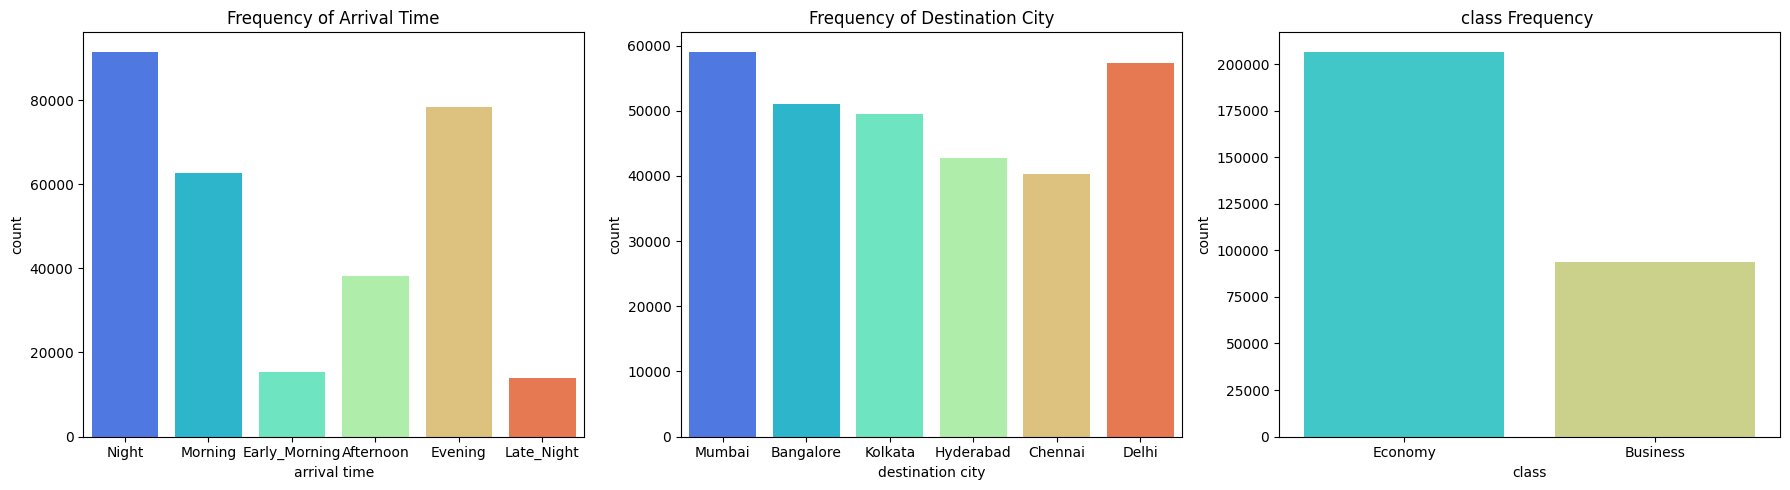

In [186]:
 # Visualization of categorical features with countplot
 plt.figure(figsize=(18, 5))
 plt.subplot(1, 3, 1)
 sns.countplot(x=flight['arrival_time'],palette='rainbow')
plt.title('Frequency of Arrival Time')
plt.xlabel('arrival time')
plt.ylabel('count')

plt.subplot(1, 3, 2)
sns.countplot(x=flight['destination_city'],palette='rainbow')
plt.title('Frequency of Destination City')
plt.xlabel('destination city')
plt.ylabel('count')

plt.subplot(1, 3, 3)
sns.countplot(x=flight['class'],palette='rainbow')
 plt.title('class Frequency ')
 plt.xlabel('class')
 plt.ylabel('count')

 plt.tight_layout()
 plt.show()

In [187]:
# info
flight.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300153 non-null  object 
 1   flight            300153 non-null  object 
 2   source_city       300153 non-null  object 
 3   departure_time    300153 non-null  object 
 4   stops             300153 non-null  object 
 5   arrival_time      300153 non-null  object 
 6   destination_city  300153 non-null  object 
 7   class             300153 non-null  object 
 8   duration          300153 non-null  float64
 9   days_left         300153 non-null  int64  
 10  price             300153 non-null  int64  
dtypes: float64(1), int64(2), object(8)
memory usage: 25.2+ MB


In [188]:
# label encoding
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for i in flight.columns:
    if flight[i].dtype=='object':
        flight[i]=le.fit_transform(flight[i])


In [189]:
flight.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300153 non-null  int64  
 1   flight            300153 non-null  int64  
 2   source_city       300153 non-null  int64  
 3   departure_time    300153 non-null  int64  
 4   stops             300153 non-null  int64  
 5   arrival_time      300153 non-null  int64  
 6   destination_city  300153 non-null  int64  
 7   class             300153 non-null  int64  
 8   duration          300153 non-null  float64
 9   days_left         300153 non-null  int64  
 10  price             300153 non-null  int64  
dtypes: float64(1), int64(10)
memory usage: 25.2 MB


In [190]:
# corelation
# get data except flight
cor=flight.corr()
cor

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
airline,1.000000,0.637918,-0.028350,0.056885,-0.029838,0.037714,-0.030172,-0.178862,-0.001651,-0.010678,0.243358
flight,0.637918,1.000000,-0.009443,0.071564,-0.118833,0.067175,-0.036248,-0.259531,0.205502,-0.000443,0.305872
source_city,-0.028350,-0.009443,1.000000,-0.004688,0.001819,0.044153,-0.222935,0.000075,0.008619,-0.003568,0.004594
departure_time,0.056885,0.071564,-0.004688,1.000000,-0.008518,-0.046282,-0.001761,-0.053340,0.084348,-0.001597,0.058319
stops,-0.029838,-0.118833,0.001819,-0.008518,1.000000,0.010515,-0.012846,0.100262,-0.473860,-0.007047,-0.202620
arrival_time,0.037714,0.067175,0.044153,-0.046282,0.010515,1.000000,-0.037431,-0.027647,0.008679,-0.004191,0.042043
destination_city,-0.030172,-0.036248,-0.222935,-0.001761,-0.012846,-0.037431,1.000000,0.001603,0.001736,-0.005323,0.004795
class,-0.178862,-0.259531,0.000075,-0.053340,0.100262,-0.027647,0.001603,1.000000,-0.138710,0.013039,-0.937860
duration,-0.001651,0.205502,0.008619,0.084348,-0.473860,0.008679,0.001736,-0.138710,1.000000,-0.039157,0.204222
days_left,-0.010678,-0.000443,-0.003568,-0.001597,-0.007047,-0.004191,-0.005323,0.013039,-0.039157,1.000000,-0.091949


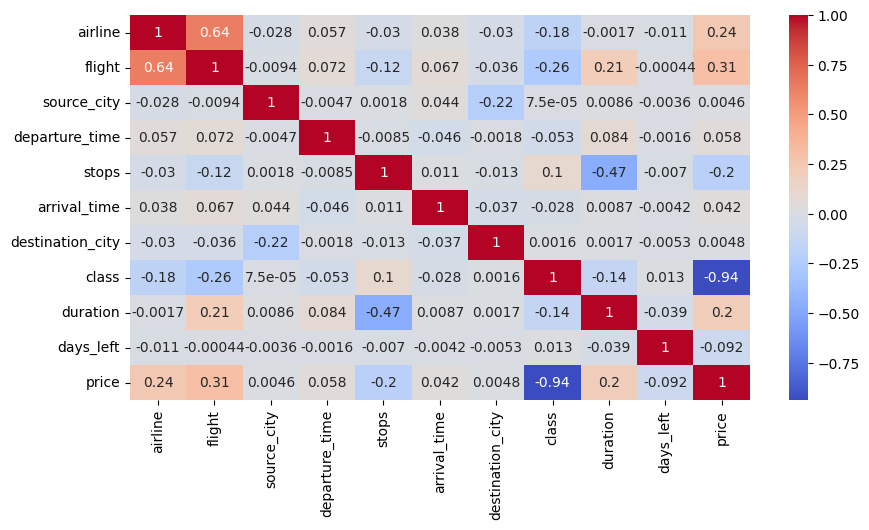

In [191]:
# heatmap
plt.figure(figsize=(10,5))
sns.heatmap(cor,annot=True,cmap="coolwarm")
plt.show()

# VIF

In [192]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [193]:
# price is target so not include in vif
col_list=[]
for i in flight.columns:
    if i!='price':
        col_list.append(i)

x=flight[col_list]
vif=pd.DataFrame()
vif['feature']=x.columns
vif['VIF']=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
vif

,feature,VIF
0,airline,6.701818
1,flight,12.675046
2,source_city,2.969540
3,departure_time,2.806009
4,stops,1.437326
5,arrival_time,3.784873
6,destination_city,2.918792
7,class,2.852072
8,duration,4.754588
9,days_left,4.071591


In [194]:
# Dropping features are having VIF  less than 5.
flight.drop(['flight','stops'],axis=1,inplace=True)

In [195]:
# recheck vif
col_list=[]
for i in flight.columns:
    if i!='price':
        col_list.append(i)

x=flight[col_list]
vif=pd.DataFrame()
vif['feature']=x.columns
vif['VIF']=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
vif

,feature,VIF
0,airline,3.370020
1,source_city,2.895803
2,departure_time,2.746255
3,arrival_time,3.632792
4,destination_city,2.857808
5,class,2.776721
6,duration,3.429344
7,days_left,3.950132


In [196]:
flight.head()

,airline,source_city,departure_time,arrival_time,destination_city,class,duration,days_left,price
0,4,2,2,5,5,1,2.17,1,5953
1,4,2,1,4,5,1,2.33,1,5953
2,0,2,1,1,5,1,2.17,1,5956
3,5,2,4,0,5,1,2.25,1,5955
4,5,2,4,4,5,1,2.33,1,5955


# Linear Regression

In [197]:
# train test
from sklearn.model_selection import train_test_split
x=flight.iloc[:,:-1]
y=flight.iloc[:,-1]

In [200]:
x.shape

(300153, 8)

In [201]:
y.shape

(300153,)

In [202]:
# train test
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [205]:
# sklearn processing
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

In [206]:
# linear regression
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [207]:
# predict
y_pred=lr.predict(x_test)

In [210]:
# Calculating r2 score,MAE, MAPE, MSE, RMSE
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error,mean_absolute_percentage_error
print('R2 Score:',r2_score(y_test,y_pred))
print('MAE:',mean_absolute_error(y_test,y_pred))
print('MAPE:',mean_absolute_percentage_error(y_test,y_pred))
print('MSE:',mean_squared_error(y_test,y_pred))
print('RMSE:',np.sqrt(mean_squared_error(y_test,y_pred)))


R2 Score: 0.897752737512321
MAE: 4468.426673542113
MAPE: 0.34765804610681816
MSE: 52706651.33334208
RMSE: 7259.934664536733


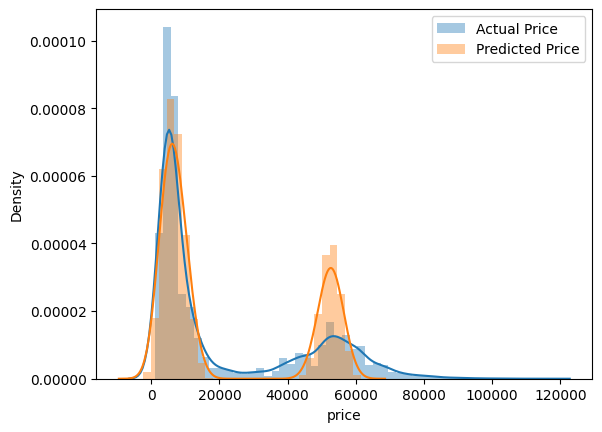

In [214]:
# Linear Regression plot
sns.distplot(y_test,label='Actual Price')
sns.distplot(y_pred,label='Predicted Price')
plt.legend()
plt.show()

In [216]:
# accuracy score
lr.score(x_train,y_train)

0.8974577043791632

# Decision tree

In [217]:
# decision tree
from sklearn.tree import DecisionTreeRegressor
dt=DecisionTreeRegressor()


In [218]:
# fit
dt.fit(x_train,y_train)

DecisionTreeRegressor()

In [219]:
# predict
y_pred=dt.predict(x_test)

In [220]:
# Calculating r2 score,MAE, MAPE, MSE, RMSE
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error,mean_absolute_percentage_error
print('R2 Score:',r2_score(y_test,y_pred))
print('MAE:',mean_absolute_error(y_test,y_pred))
print('MAPE:',mean_absolute_percentage_error(y_test,y_pred))
print('MSE:',mean_squared_error(y_test,y_pred))
print('RMSE:',np.sqrt(mean_squared_error(y_test,y_pred)))


R2 Score: 0.9748043665480324
MAE: 1214.813904482684
MAPE: 0.07738143510002214
MSE: 12987902.415828211
RMSE: 3603.8732519094247


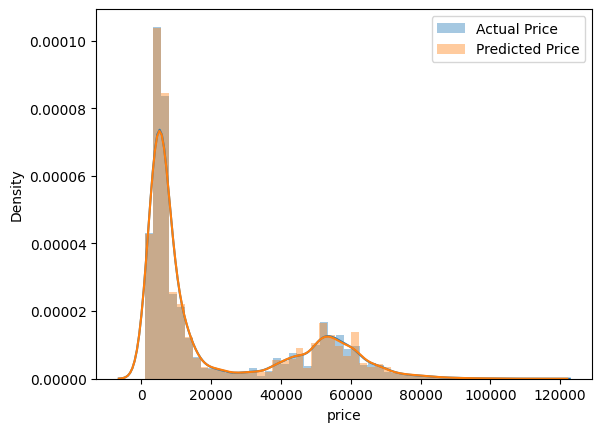

In [221]:
# Linear Regression plot
sns.distplot(y_test,label='Actual Price')
sns.distplot(y_pred,label='Predicted Price')
plt.legend()
plt.show()

In [222]:
# accuracy
dt.score(x_train,y_train)

0.9991450102426359

# Random forest

In [223]:
# random forest
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()

In [224]:
# fit
rf.fit(x_train,y_train)

RandomForestRegressor()

In [225]:
# predict
y_pred=rf.predict(x_test)

In [226]:
# Calculating r2 score,MAE, MAPE, MSE, RMSE
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error,mean_absolute_percentage_error
print('R2 Score:',r2_score(y_test,y_pred))
print('MAE:',mean_absolute_error(y_test,y_pred))
print('MAPE:',mean_absolute_percentage_error(y_test,y_pred))
print('MSE:',mean_squared_error(y_test,y_pred))
print('RMSE:',np.sqrt(mean_squared_error(y_test,y_pred)))


R2 Score: 0.9845410183557197
MAE: 1123.030000725635
MAPE: 0.0732843883632392
MSE: 7968831.005053064
RMSE: 2822.9117954787507


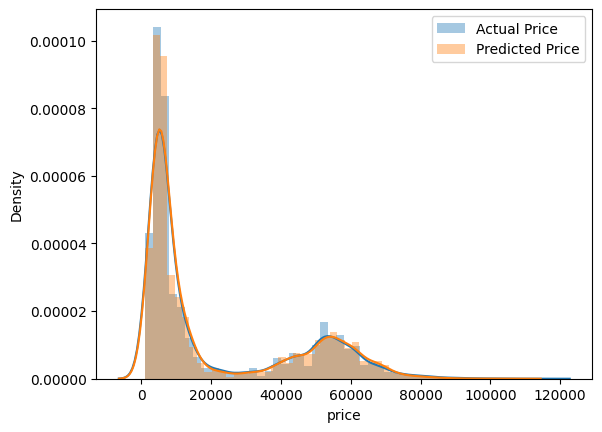

In [227]:
# Linear Regression plot
sns.distplot(y_test,label='Actual Price')
sns.distplot(y_pred,label='Predicted Price')
plt.legend()
plt.show()

In [229]:
# accuracy
rf.score(x_train,y_train)*100

99.7320353831707